In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
from sklearn.svm import SVC
%matplotlib inline

In [27]:
data_seet= pd.read_csv(r'C:\Users\suraj\python\Project_SML\diabetic_data.csv')

In [28]:
df=pd.DataFrame(data_seet)

df=df.replace("?",np.nan)
dropping=df.isnull().sum()[df.isnull().sum()>1]/len(df)*100
dropping

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [29]:
df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'],axis=1,inplace=True)

In [30]:
Daibetics_DattaM = df
Daibetics_DattaM.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [31]:
def ScallingAll(Data_In):
    scaler = StandardScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    
    return Data_Features
    raise NotImplementedError
    
    
    

    
def Scalling(Data_In):
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    Data_Readd = Data_Features['readmitted']   
    Data_Readd = Data_Readd.replace({"NO":0,"<30":1,">30":0})
    Data_Features = Data_Features.drop(['readmitted'],axis=1)
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    

        
    #Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    Data_Features['readmitted'] = Data_Readd
    
    return Data_Features
    raise NotImplementedError

In [32]:
Data_scalled= Scalling(Daibetics_DattaM)
Data_scalled

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.427557,-0.927397,-3.824600,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0
1,0.427557,-0.927397,-3.197277,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
2,-1.703706,-0.927397,-2.569954,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
3,0.427557,1.078031,-1.942632,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
4,0.427557,1.078031,-1.315309,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,-1.703706,1.078031,0.566659,-0.708461,-0.135535,0.306482,-0.467653,0.401761,-0.785398,-0.002688,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
101762,-1.703706,-0.927397,1.193982,-0.708461,0.053854,-0.185636,0.202343,-0.513139,0.973309,0.243390,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
101763,0.427557,1.078031,0.566659,-0.708461,-0.514312,0.306482,-1.137649,0.503417,-0.785398,-0.863958,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
101764,0.427557,-0.927397,1.193982,-0.016609,-0.135535,0.306482,1.877333,0.096794,0.387074,0.612506,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0


In [33]:
Holding_Data = Data_scalled[100000:101765]
Holding_Data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
100000,-1.703706,1.078031,-0.060664,-0.708461,0.622021,0.306482,-1.137649,0.300106,-0.199162,-0.494842,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
100001,0.427557,-0.927397,-0.687986,0.675243,0.432632,-1.169873,-0.802651,-2.139630,-0.785398,1.104660,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
100002,1.493189,-0.927397,-0.687986,-0.708461,-0.514312,0.306482,-0.802651,-0.208172,-0.785398,-1.479152,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0
100003,0.427557,1.078031,0.566659,-0.708461,-0.514312,0.306482,-0.132655,-0.157345,-0.785398,-0.494842,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
100004,0.427557,1.078031,1.193982,-0.708461,-0.135535,0.306482,-0.132655,1.316662,-0.785398,-0.371804,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,-1.703706,-0.927397,-0.060664,-0.708461,-0.514312,0.306482,0.537341,0.096794,-0.199162,1.104660,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
101761,-1.703706,1.078031,0.566659,-0.708461,-0.135535,0.306482,-0.467653,0.401761,-0.785398,-0.002688,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
101762,-1.703706,-0.927397,1.193982,-0.708461,0.053854,-0.185636,0.202343,-0.513139,0.973309,0.243390,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
101763,0.427557,1.078031,0.566659,-0.708461,-0.514312,0.306482,-1.137649,0.503417,-0.785398,-0.863958,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0


In [34]:
Model_Data = Data_scalled[:99999]
Model_Data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.427557,-0.927397,-3.824600,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0
1,0.427557,-0.927397,-3.197277,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
2,-1.703706,-0.927397,-2.569954,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
3,0.427557,1.078031,-1.942632,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
4,0.427557,1.078031,-1.315309,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-1.703706,-0.927397,-0.060664,-0.708461,-0.514312,0.306482,-0.132655,1.062523,-0.785398,-0.125726,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0
99995,0.427557,-0.927397,0.566659,0.675243,-0.514312,-1.169873,-0.467653,-0.563967,-0.199162,1.104660,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0
99996,0.427557,1.078031,-0.687986,-0.708461,0.622021,0.306482,-1.137649,0.045967,-0.199162,-0.494842,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0
99997,0.427557,1.078031,-0.687986,-0.708461,0.622021,0.306482,-1.137649,0.554245,0.973309,-0.617881,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,1


In [163]:
Data_scalledc=ScallingAll(Daibetics_DattaM)

Readmitted_Data=Model_Data['readmitted']

CorrelationR = Model_Data.corrwith(Readmitted_Data)
CorrelationR=CorrelationR.dropna()
CorrelationR

print('---------------------------------------------------------')
print('Correlation of Various Features with Readmission rate')
print('---------------------------------------------------------')
print('\n')
print(CorrelationR)



---------------------------------------------------------
Correlation of Various Features with Readmission rate
---------------------------------------------------------


race                        0.002879
gender                     -0.002887
age                         0.017534
admission_type_id          -0.011269
discharge_disposition_id    0.050209
admission_source_id         0.005888
time_in_hospital            0.044395
num_lab_procedures          0.019939
num_procedures             -0.011610
num_medications             0.038076
number_outpatient           0.018541
number_emergency            0.060223
number_inpatient            0.165389
diag_1                     -0.008266
diag_2                      0.003729
diag_3                      0.013236
number_diagnoses            0.049767
max_glu_serum              -0.007381
A1Cresult                   0.007679
metformin                  -0.023504
repaglinide                 0.010493
nateglinide                 0.000116
chlorpropamide

In [36]:
raddmit = abs( CorrelationR)
raddmit = raddmit.drop('readmitted')
#sns.distplot(raddmit,bins=30)
#plt.figure(figsize=(15,12))
#plt.plot(raddmit)
init_notebook_mode(connected=True)

cf.go_offline()

raddmit.iplot(kind='bar')

In [37]:
Redd=raddmit[(raddmit>0.02)]
#Redd

Redd=pd.DataFrame(Redd)
features=list(Redd.transpose().columns)
print(np.size(features))
print('\n')
print(features)

8


['discharge_disposition_id', 'time_in_hospital', 'num_medications', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'diabetesMed']


In [91]:
#Total Training data set with all opts

X_main = Model_Data[features]
Y_main = Model_Data['readmitted']

#Equal proportion opt data set
#11161[:11161]
Sort_data_0=Model_Data[Model_Data['readmitted'] == 0][:(11161*4)]
Sort_data_1=Model_Data[Model_Data['readmitted'] == 1]
Sort_data = pd.concat([Sort_data_1,Sort_data_0],axis = 0)

X_main_S = Sort_data[features]
Y_main_S = Sort_data['readmitted']

# Validation Data Set
X_valid = Holding_Data[features]
Y_valid = Holding_Data['readmitted']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error


# Total Training Data Set
#X_train, X_test, y_train, y_test = train_test_split(X_main,Y_main , test_size=0.2, random_state=1)

# Equal proportion opt data set

X_train, X_test, y_train, y_test = train_test_split(X_main_S,Y_main_S , test_size=0.2, random_state=11)


#from sklearn.linear_model import LinearRegression

logmodel_T = LogisticRegression()

Parameter_grid = [{
#    'penalty': ['l1','l2'],
    'penalty': ['l2'],
    'C': np.linspace(0,2,100),
#    'solver':['newton-cg', 'lbfgs'],
    'solver':['newton-cg'],
    'max_iter': np.arange(0,21000,1000)
}]


clf = GridSearchCV(logmodel_T, Parameter_grid,cv=5,verbose=3,n_jobs=4)

Best_Clf = clf.fit(X_train,y_train)

###########_______________________________________________________________________________________________________________
print('\n')
print(Best_Clf.best_params_)
print('\n')
logmodel = Best_Clf.best_estimator_

logmodel.fit(X_train,y_train)
#lm.fit(X_train,y_train)

logmodel.fit(X_test,y_test)

logmodel.fit(X_main_S,Y_main_S)

logmodel.fit(X_valid,Y_valid)

print('***Results of Logistic Reg***')
print('\n')
print('Score_Model_train:   ',logmodel.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',logmodel.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',logmodel.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation:   ',logmodel.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

predictions = logmodel.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,predictions)
mae = mean_absolute_error(Y_valid,predictions)
print('***Analysis of Logistic Reg _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
print(confusion_matrix(Y_valid,predictions))
print('\n')

print(classification_report(Y_valid,predictions))

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   38.3s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 18.3min
[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed: 20.6min
[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 23.5min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 25.0min




{'C': 0.04040404040404041, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


***Results of Logistic Reg***


Score_Model_train:    0.8030418421288416


Score_Model_test:    0.7928501030373623


Score_Model_All_Main:    0.8010034943105456


Score_Validation:    0.8878186968838527




***Analysis of Logistic Reg _ Test_ Data***


MSE: 0.11218130311614731


MAE: 0.11218130311614731


[[1565    4]
 [ 194    2]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1569
           1       0.33      0.01      0.02       196

    accuracy                           0.89      1765
   macro avg       0.61      0.50      0.48      1765
weighted avg       0.83      0.89      0.84      1765



In [148]:
from tabulate import tabulate

# a= y predicted_data  b= y_data

def conf_table(a,b):
    cm = confusion_matrix(y_pred = a,y_true = b[:], labels=[0,1])
    rows = np.array([["Actual Failures"], ["Actual Successfull"]])
    rows = np.concatenate((rows,cm), axis=1)
    headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
    table = tabulate(rows,headers, tablefmt="grid")

    return print(table)



In [153]:
LR_pred_test = logmodel.predict(X_test)
LR_pred_train = logmodel.predict(X_train)
LR_pred_hold = logmodel.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Logistic Reg _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(LR_pred_train,y_train)
print('\n')
print(classification_report(y_train,LR_pred_train))
print('------------------------------------------------')
print('***Analysis of Logistic Reg _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(LR_pred_test,y_test)
print('\n')
print(classification_report(y_test,LR_pred_test))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(LR_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,LR_pred_hold))
print('\n')



------------------------------------------------
***Analysis of Logistic Reg _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               35785 |                      21 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8772 |                      66 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     35806
           1       0.76      0.01      0.01      8838

    accuracy                           0.80     44644
   macro avg       0.78      0.50      0.45     44644
weighted avg       0.79      0.80      0.72     44644

---------------------------

Text(0, 0.5, 'mean_test_score')

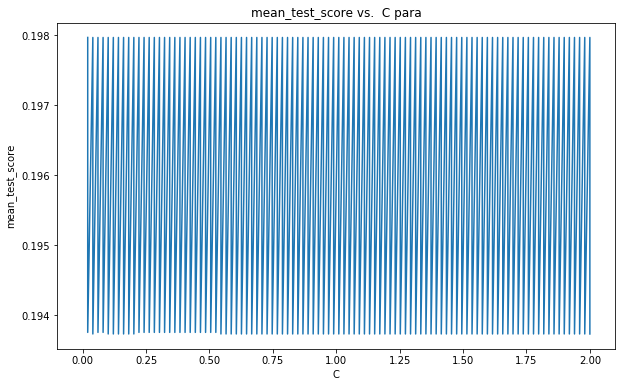

In [101]:
LR_result = pd.DataFrame(clf.cv_results_)

error_dtrate=1-(LR_result['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(LR_result['param_C'],error_dtrate)
plt.title('mean_test_score vs.  C para')
plt.xlabel('C')
plt.ylabel('mean_test_score')

In [102]:
# Random Forest Analysis

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Parameter_grid_RF = [{'n_estimators': np.arange(0,500,1) }]

#np.linspace(20000,1000,20)

clf_RF = GridSearchCV(rfc, Parameter_grid_RF,cv=5,verbose=3,n_jobs=4)

Best_Clf_RF = clf_RF.fit(X_train,y_train)

###########_______________________________________________________________________________________________________________
print('\n')
print(Best_Clf_RF.best_params_)
print('\n')
rfc = Best_Clf_RF.best_estimator_

rfc.fit(X_train,y_train)
#lm.fit(X_train,y_train)

rfc.fit(X_test,y_test)

rfc.fit(X_main_S,Y_main_S)

rfc.fit(X_valid,Y_valid)

print('***Results of RF***')
print('\n')
print('Score_Model_train:   ',rfc.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',rfc.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',rfc.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation:   ',rfc.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

RF_predictions = rfc.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,RF_predictions)
mae = mean_absolute_error(Y_valid,RF_predictions)
print('***Analysis of RF _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
print(confusion_matrix(Y_valid,RF_predictions))
print('\n')

print(classification_report(Y_valid,RF_predictions))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   37.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 20.0min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 38.7min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 69.7min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 115.4min
[Parallel(n_jobs=4)]: Done 2500 out of 2500 | elapsed: 172.1min finished




{'n_estimators': 267}


***Results of RF***


Score_Model_train:    0.79475405429621


Score_Model_test:    0.7829047576382044


Score_Model_All_Main:    0.7923841949646089


Score_Validation:    0.9875354107648725




***Analysis of RF _ Test_ Data***


MSE: 0.012464589235127478


MAE: 0.012464589235127478


[[1568    1]
 [  21  175]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1569
           1       0.99      0.89      0.94       196

    accuracy                           0.99      1765
   macro avg       0.99      0.95      0.97      1765
weighted avg       0.99      0.99      0.99      1765



In [152]:
RF_pred_test = rfc.predict(X_test)
RF_pred_train = rfc.predict(X_train)
RF_pred_hold = rfc.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Random Forest  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_train,y_train)
print('\n')
print(classification_report(y_train,RF_pred_train))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_test,y_test)
print('\n')
print(classification_report(y_test,RF_pred_test))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,RF_pred_hold))
print('\n')



------------------------------------------------
***Analysis of Random Forest  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               35204 |                     602 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8561 |                     277 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

           0       0.80      0.98      0.88     35806
           1       0.32      0.03      0.06      8838

    accuracy                           0.79     44644
   macro avg       0.56      0.51      0.47     44644
weighted avg       0.71      0.79      0.72     44644

-------------------------

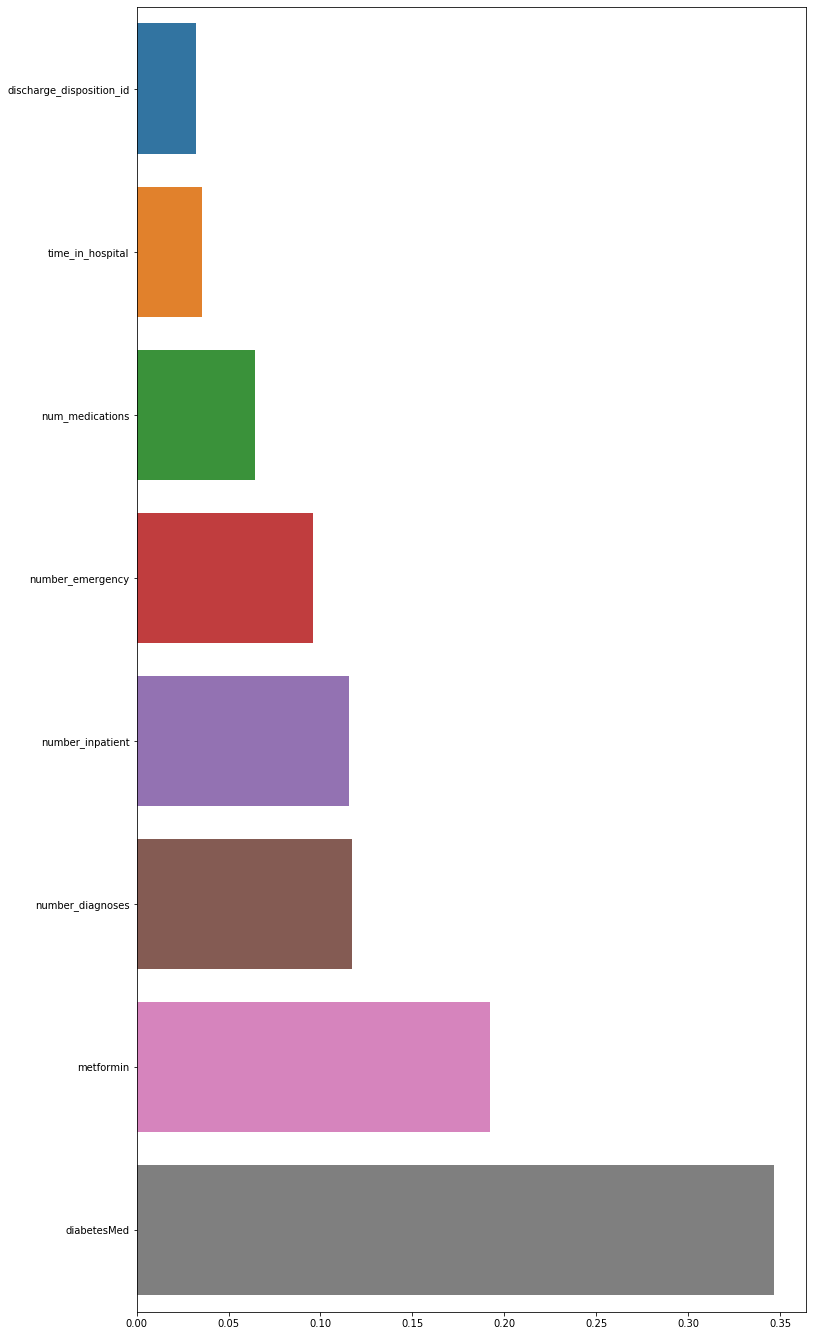

In [104]:
plt.figure(figsize=(12,24))
sns.barplot(sorted(rfc.feature_importances_),X_valid.columns)

Text(0, 0.5, 'Error Rate')

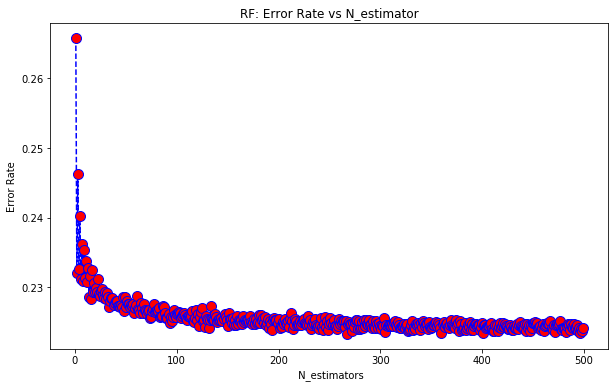

In [126]:
rfc_results = pd.DataFrame(clf_RF.cv_results_)

error_dtrate=1-(rfc_results['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(rfc_results['param_n_estimators'],error_dtrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RF: Error Rate vs N_estimator')
plt.xlabel(' N_estimators')
plt.ylabel('Error Rate')

In [164]:
# SVM Analysis
model_svc = SVC(kernel='rbf',C=30,gamma='auto')

Parameter_SVM  =  {
    'C': np.arange(0,10,1),
    'kernel': ['rbf']
    #['rbf','linear']
}

clf_SVM = GridSearchCV(model_svc, Parameter_SVM,cv=3,verbose=3,n_jobs=4)

Best_Clf_SVM = clf_SVM.fit(X_train,y_train)

###########_______________________________________________________________________________________________________________
print('\n')
print(Best_Clf_SVM.best_params_)
print('\n')
model_svc = Best_Clf_SVM.best_estimator_
#SVC(kernel='rbf',C=1,gamma='auto')

#Best_Clf_SVM.best_estimator_

model_svc.fit(X_train,y_train)
#lm.fit(X_train,y_train)

model_svc.fit(X_test,y_test)

model_svc.fit(X_main_S,Y_main_S)

model_svc.fit(X_valid,Y_valid)

print('***Results of SVM***')
print('\n')
print('Score_Model_train:   ',model_svc.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',model_svc.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',model_svc.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation:   ',model_svc.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

SVM_predictions = model_svc.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,SVM_predictions)
mae = mean_absolute_error(Y_valid,SVM_predictions)
print('***Analysis of SVM _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
print(confusion_matrix(Y_valid,SVM_predictions))
print('\n')

print(classification_report(Y_valid,SVM_predictions))



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 28.6min finished




{'C': 1, 'kernel': 'rbf'}


***Results of SVM***


Score_Model_train:    0.8020786667861303


Score_Model_test:    0.7918645282680763


Score_Model_All_Main:    0.8000358390825195


Score_Validation:    0.8923512747875354




***Analysis of SVM _ Test_ Data***


MSE: 0.10764872521246459


MAE: 0.10764872521246459


[[1569    0]
 [ 190    6]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1569
           1       1.00      0.03      0.06       196

    accuracy                           0.89      1765
   macro avg       0.95      0.52      0.50      1765
weighted avg       0.90      0.89      0.84      1765



In [165]:
SVC_pred_test = model_svc.predict(X_test)
SVC_pred_train = model_svc.predict(X_train)
SVC_pred_hold = model_svc.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of SVM  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(SVC_pred_train,y_train)
print('\n')
print(classification_report(y_train,SVC_pred_train))
print('------------------------------------------------')
print('***Analysis of SVM _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(SVC_pred_test,y_test)
print('\n')
print(classification_report(y_test,SVC_pred_test))
print('------------------------------------------------')
print('***Analysis of SVM _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(SVC_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,SVC_pred_hold))
print('\n')



------------------------------------------------
***Analysis of SVM  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               35801 |                       5 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8831 |                       7 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     35806
           1       0.58      0.00      0.00      8838

    accuracy                           0.80     44644
   macro avg       0.69      0.50      0.45     44644
weighted avg       0.76      0.80      0.71     44644

-----------------------------------

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0, 0.5, 'Error Rate')

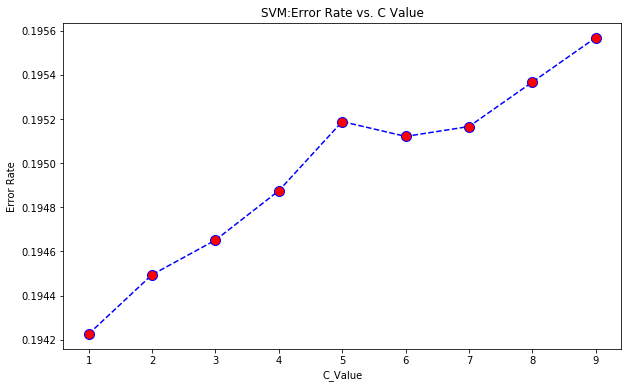

In [166]:
SVM_results = pd.DataFrame(clf_SVM.cv_results_)
#Dt_re_err=DT_results[DT_results['param_criterion']=='entropy']
error_dtrate=1-(SVM_results['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(SVM_results['param_C'],error_dtrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('SVM:Error Rate vs. C Value')
plt.xlabel('C_Value')
plt.ylabel('Error Rate')

In [116]:
#KNN  Analysis

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Parameter_knn  =  {
    'n_neighbors': np.arange(1,50,1),
}

clf_knn = GridSearchCV(knn, Parameter_knn,cv=5,verbose=3,n_jobs=4)

Best_Clf_knn = clf_knn.fit(X_train,y_train)

print('\n')
print(Best_Clf_knn.best_params_)
print('\n')
knn = Best_Clf_knn.best_estimator_

knn.fit(X_train,y_train)
#lm.fit(X_train,y_train)

knn.fit(X_test,y_test)

knn.fit(X_main_S,Y_main_S)

knn.fit(X_valid,Y_valid)

print('***Results of KNN***')
print('\n')
print('Score_Model_train:   ',knn.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',knn.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',knn.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation:   ',knn.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

K_predictions = knn.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,K_predictions)
mae = mean_absolute_error(Y_valid,K_predictions)
print('***Analysis of KNN _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
print(confusion_matrix(Y_valid,K_predictions))
print('\n')

print(classification_report(Y_valid,K_predictions))



Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   57.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 245 out of 245 | elapsed:  9.5min finished




{'n_neighbors': 42}


***Results of KNN***


Score_Model_train:    0.8020338679329809


Score_Model_test:    0.7918645282680763


Score_Model_All_Main:    0.8


Score_Validation:    0.8889518413597733




***Analysis of KNN _ Test_ Data***


MSE: 0.11104815864022663


MAE: 0.11104815864022663


[[1569    0]
 [ 196    0]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1569
           1       0.00      0.00      0.00       196

    accuracy                           0.89      1765
   macro avg       0.44      0.50      0.47      1765
weighted avg       0.79      0.89      0.84      1765



C:\Users\suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [156]:
knn_pred_test = knn.predict(X_test)
knn_pred_train = knn.predict(X_train)
knn_pred_hold = knn.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of KNN  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(knn_pred_train,y_train)
print('\n')
print(classification_report(y_train,knn_pred_train))
print('------------------------------------------------')
print('***Analysis of KNN _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(knn_pred_test,y_test)
print('\n')
print(classification_report(y_test,knn_pred_test))
print('------------------------------------------------')
print('***Analysis of KNN _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(knn_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,knn_pred_hold))
print('\n')



------------------------------------------------
***Analysis of KNN  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               35806 |                       0 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8838 |                       0 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     35806
           1       0.00      0.00      0.00      8838

    accuracy                           0.80     44644
   macro avg       0.40      0.50      0.45     44644
weighted avg       0.64      0.80      0.71     44644

-----------------------------------

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0, 0.5, 'Error Rate')

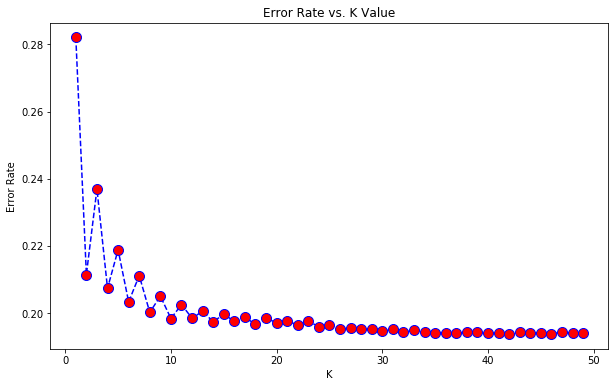

In [155]:
# ERROR RATE VS VARYING PARAMETER PLOT
results_knn=pd.DataFrame(clf_knn.cv_results_)

error_rate = []
yvalid = np.array(Y_valid)
# Will take some time
for i in range(1,50):
    error_rate.append(np.mean(K_predictions[i] != yvalid[i]))
    
    
error_r=1-(results_knn['mean_test_score'])
plt.figure(figsize=(10,6))
plt.plot(results_knn['param_n_neighbors'],error_r,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [122]:
#Decision tree Classifier 

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

Parameter_tree = {'criterion':['entropy'],'max_depth':np.arange(0,200,1)}

clf_DT = GridSearchCV(dtree, Parameter_tree,cv=5,verbose=3,n_jobs=4)

Best_Clf_tree = clf_DT.fit(X_train,y_train)

print('\n')
print(Best_Clf_tree.best_params_)
print('\n')
dtree = Best_Clf_tree.best_estimator_

dtree.fit(X_train,y_train)
#lm.fit(X_train,y_train)

dtree.fit(X_test,y_test)

dtree.fit(X_main_S,Y_main_S)

dtree.fit(X_valid,Y_valid)

print('***Results of Descion Tree***')
print('\n')
print('Score_Model_train:   ',dtree.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',dtree.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',dtree.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation:   ',dtree.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

DT_predictions = dtree.predict(X_test)

print('\n')
print('\n')
mse = mean_squared_error (y_test,DT_predictions)
mae = mean_absolute_error(y_test,DT_predictions)
print('***Analysis of Decision Tree _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
print(confusion_matrix(y_test,DT_predictions))
print('\n')

print(classification_report(y_test,DT_predictions))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 356 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done 516 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done 740 tasks      | elapsed:   42.5s




{'criterion': 'entropy', 'max_depth': 3}


***Results of Descion Tree***


Score_Model_train:    0.8023474599050264


Score_Model_test:    0.7908789534987904


Score_Model_All_Main:    0.8000537586237793


Score_Validation:    0.8923512747875354




***Analysis of Decision Tree _ Test_ Data***


MSE: 0.20912104650120958


MAE: 0.20912104650120958


[[8775   63]
 [2271   52]]


              precision    recall  f1-score   support

           0       0.79      0.99      0.88      8838
           1       0.45      0.02      0.04      2323

    accuracy                           0.79     11161
   macro avg       0.62      0.51      0.46     11161
weighted avg       0.72      0.79      0.71     11161



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   58.0s finished


In [157]:
DT_pred_test = dtree.predict(X_test)
DT_pred_train = dtree.predict(X_train)
DT_pred_hold = dtree.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Decision tree  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(DT_pred_train,y_train)
print('\n')
print(classification_report(y_train,DT_pred_train))
print('------------------------------------------------')
print('***Analysis of Decision tree _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(DT_pred_test,y_test)
print('\n')
print(classification_report(y_test,DT_pred_test))
print('------------------------------------------------')
print('***Analysis of Decision tree _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(DT_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,DT_pred_hold))
print('\n')



------------------------------------------------
***Analysis of Decision tree  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               35608 |                     198 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8626 |                     212 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

           0       0.80      0.99      0.89     35806
           1       0.52      0.02      0.05      8838

    accuracy                           0.80     44644
   macro avg       0.66      0.51      0.47     44644
weighted avg       0.75      0.80      0.72     44644

-------------------------

Text(0, 0.5, 'Error Rate')

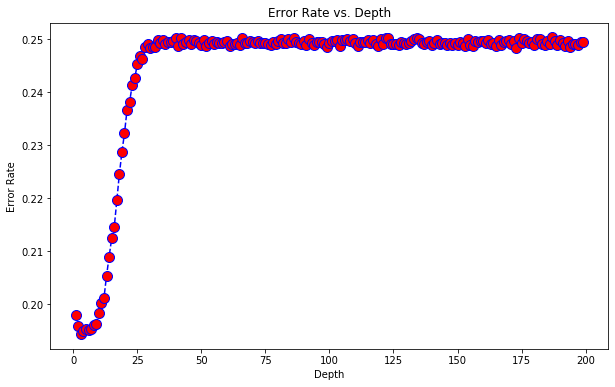

In [125]:
# ERROR RATE VS VARYING PARAMETER PLOT
DT_results = pd.DataFrame(clf_DT.cv_results_)
Dt_re_err=DT_results[DT_results['param_criterion']=='entropy']
error_dtrate=1-(Dt_re_err['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(Dt_re_err['param_max_depth'],error_dtrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Error Rate')

In [170]:

def Data_out(features,n):
    #Total Training data set with all opts

    X_main = Model_Data[features]
    Y_main = Model_Data['readmitted']

    #Equal proportion opt data set
    #11161[:11161]
    Sort_data_0=Model_Data[Model_Data['readmitted'] == 0][:(11161*n)]
    Sort_data_1=Model_Data[Model_Data['readmitted'] == 1]
    Sort_data = pd.concat([Sort_data_1,Sort_data_0],axis = 0)

    X_main_S = Sort_data[features]
    Y_main_S = Sort_data['readmitted']

    # Validation Data Set
    X_valid = Holding_Data[features]
    Y_valid = Holding_Data['readmitted']
    
    main = [X_main,Y_main]
    S_main = [X_main_S,Y_main_S]
    valid =[X_valid,Y_valid]
    
    return  [main,S_main,valid]

In [206]:
## MAIN MODEL ANALYSIS##

[main,S_main,valid] = Data_out(features,7)
X_main_S = S_main[0]
Y_main_S = S_main[1]
X_valid = valid[0]
Y_valid = valid [1] 
X_train, X_test, y_train, y_test = train_test_split(X_main_S,Y_main_S , test_size=0.2, random_state=101)
#Main Model Random Forest Analysis

rfc = RandomForestClassifier(n_estimators=267)

rfc.fit(X_train,y_train)
#lm.fit(X_train,y_train)

rfc.fit(X_test,y_test)

rfc.fit(X_main_S,Y_main_S)

rfc.fit(X_valid,Y_valid)

print('***Results of RF***')
print('\n')
print('Score_Model_train:   ',rfc.score(X_train,y_train))
print('\n')
print('Score_Model_test:   ',rfc.score(X_test,y_test))
print('\n')
print('Score_Model_All_Main:   ',rfc.score(X_main_S,Y_main_S))
print('\n')
print('Score_Validation/Holding:   ',rfc.score(X_valid,Y_valid))
#logmodel.score(X_test,y_test)

RF_predictions = rfc.predict(X_valid)

print('\n')
print('\n')
mse = mean_squared_error (Y_valid,RF_predictions)
mae = mean_absolute_error(Y_valid,RF_predictions)
print('***Analysis of RF _ Test_ Data***')
print('\n')
print('MSE:',mse)
print('\n')
print('MAE:',mae)
print('\n')
RF_pred_test = rfc.predict(X_test)
RF_pred_train = rfc.predict(X_train)
RF_pred_hold = rfc.predict(X_valid)
print('\n')
print('------------------------------------------------')
print('***Analysis of Random Forest  _ Train_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_train,y_train)
print('\n')
print(classification_report(y_train,RF_pred_train))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Test_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_test,y_test)
print('\n')
print(classification_report(y_test,RF_pred_test))
print('------------------------------------------------')
print('***Analysis of Random Forest _ Holding_ Data***')
print('------------------------------------------------')
print('\n')
conf_table(RF_pred_hold,Y_valid)
print('\n')
print(classification_report(Y_valid,RF_pred_hold))
print('\n')

***Results of RF***


Score_Model_train:    0.8613327733445331


Score_Model_test:    0.8607906820472617


Score_Model_All_Main:    0.861224352656572


Score_Validation/Holding:    0.9875354107648725




***Analysis of RF _ Test_ Data***


MSE: 0.012464589235127478


MAE: 0.012464589235127478




------------------------------------------------
***Analysis of Random Forest  _ Train_ Data***
------------------------------------------------


+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               61245 |                    1259 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                8646 |                     280 |
+--------------------+---------------------+-------------------------+


              precision    recall  f1-score   support

 